# Datathon Baseline EDA
### Team : Strong Watchmen
---
#### Createed Time : 2022-11-16 (수) 11:00AM
#### Version 1
---
#### Last Modified Time : -
#### Version : -

* 목차
1. 데이타 불러오기
2. 데이타 살펴보기
3. 데이타의 이해 : 시각화
4. 데이타 전처리
5. 데이타 분리 : 훈련세트, 시험세트
6. 모델 작성
7. 모델 훈련 : 훈련세트
8. 모델 예측 : 시험세트
- 참고자료

In [368]:
import warnings
warnings.filterwarnings('ignore')

In [369]:
import os

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import seaborn as sns  
from matplotlib import pyplot as plt

# 1. 데이타 불러오기

In [370]:
atheletes = pd.read_csv(os.getenv('HOME') + '/aiffel/datathon/data/athlete_events.csv')
regions = pd.read_csv(os.getenv('HOME') + '/aiffel/datathon/data/noc_regions.csv')

In [371]:
atheletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [372]:
atheletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [373]:
atheletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [374]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


* ID - Unique number for each athlete
* Name - Athlete's name
* Sex - M or F
* Age - Integer
* Height - In centimeters
* Weight - In kilograms
* Team - Team name
* NOC - National Olympic Committee 3-letter code
* Games - Year and season
* Year - Integer
* Season - Summer or Winter
* City - Host city
* Sport - Sport
* Event - Event
* Medal - Gold, Silver, Bronze, or NA

# 2. 데이타 살펴보기

### 2.1 칼럼명 리스트

In [375]:
for c in atheletes.columns:
    print(c)

ID
Name
Sex
Age
Height
Weight
Team
NOC
Games
Year
Season
City
Sport
Event
Medal


In [376]:
for c in regions.columns:
    print(c)

NOC
region
notes


### 2.2 널 값 점검

271,116 개의 선수 활동 데이타에서 나이(9,474), 키(60,171), 체중(62,875)개의 데이타가 NULL이었다.  
메달 칼럼은 231,333개의 칼럼이 NULL이었다.

230개의 지역 데이타에서 지역(3), 노트(209) 개의 데이타가 NULL이었다.

In [377]:
print('athlete_events', len(atheletes))
print('noc_regions', len(regions))

athlete_events 271116
noc_regions 230


In [378]:
atheletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [379]:
regions.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [380]:
atheletes.duplicated().value_counts()

False    269731
True       1385
dtype: int64

### 2.3 각 칼럼의 값 카운트

In [381]:
for c in atheletes.columns:
    print('=========================')
    print(c)
    print(atheletes[c].value_counts())
    print('-------------------------')

ID
77710     58
106296    39
115354    38
119591    36
129196    32
          ..
57056      1
57055      1
57054      1
57053      1
67786      1
Name: ID, Length: 135571, dtype: int64
-------------------------
Name
Robert Tait McKenzie            58
Heikki Ilmari Savolainen        39
Joseph "Josy" Stoffel           38
Ioannis Theofilakis             36
Takashi Ono                     33
                                ..
Tatyana Vasilyevna Kalmykova     1
Mariya Lvovna Kalmykova          1
Christine Kalmer                 1
Joannis "Jannis" Kalmazidis      1
Pierre-Georges LeClercq          1
Name: Name, Length: 134732, dtype: int64
-------------------------
Sex
M    196594
F     74522
Name: Sex, dtype: int64
-------------------------
Age
23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
        ...  
77.0        2
84.0        1
10.0        1
96.0        1
97.0        1
Name: Age, Length: 74, dtype: int64
-------------------------
Height
180.0    12492
170.0    119

### 2.4 두 데이타 프레임을 연결

In [382]:
merged = pd.merge(atheletes, regions, on='NOC', how='left')

In [383]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# 3. 데이타의 이해 - 시각화

### 3.1 나이와 금메달

In [384]:
goldMedals = merged[(merged.Medal == 'Gold')]

In [385]:
# 금메달 수장자 목록에서 '나이'가 NULL인 데이타가 있는지 점검
goldMedals.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

In [386]:
# 나이가 NULL인 경우는 제와하고 목록을 준비 
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [387]:
goldMedals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13224 entries, 3 to 271076
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      13224 non-null  int64  
 1   Name    13224 non-null  object 
 2   Sex     13224 non-null  object 
 3   Age     13224 non-null  float64
 4   Height  10532 non-null  float64
 5   Weight  10248 non-null  float64
 6   Team    13224 non-null  object 
 7   NOC     13224 non-null  object 
 8   Games   13224 non-null  object 
 9   Year    13224 non-null  int64  
 10  Season  13224 non-null  object 
 11  City    13224 non-null  object 
 12  Sport   13224 non-null  object 
 13  Event   13224 non-null  object 
 14  Medal   13224 non-null  object 
 15  region  13223 non-null  object 
 16  notes   171 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 1.8+ MB


Text(0.5, 1.0, 'Distribution of Gold Medals')

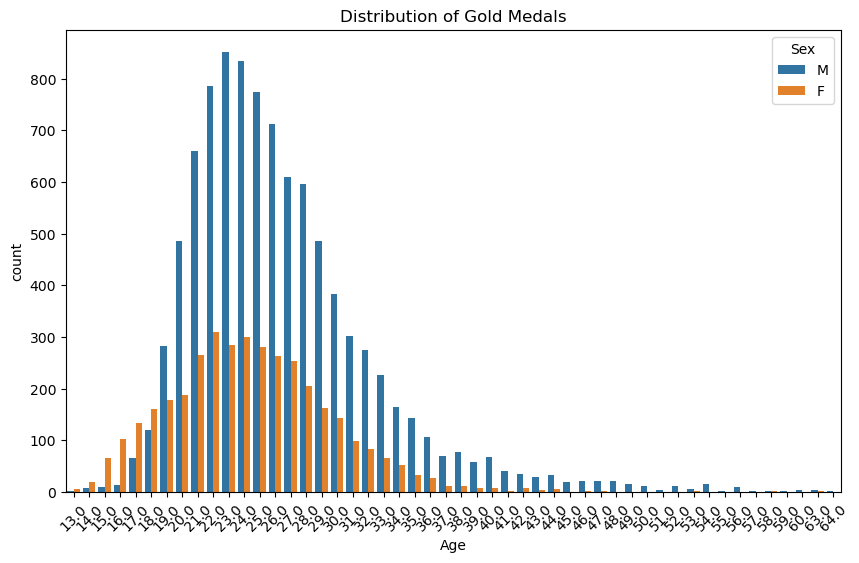

In [388]:
# 카운트플롯을 이용하여 표시 - 나이와 성별에 다른 금메달
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=goldMedals, x=goldMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Gold Medals')

Text(0.5, 1.0, 'Distribution of Silver Medals')

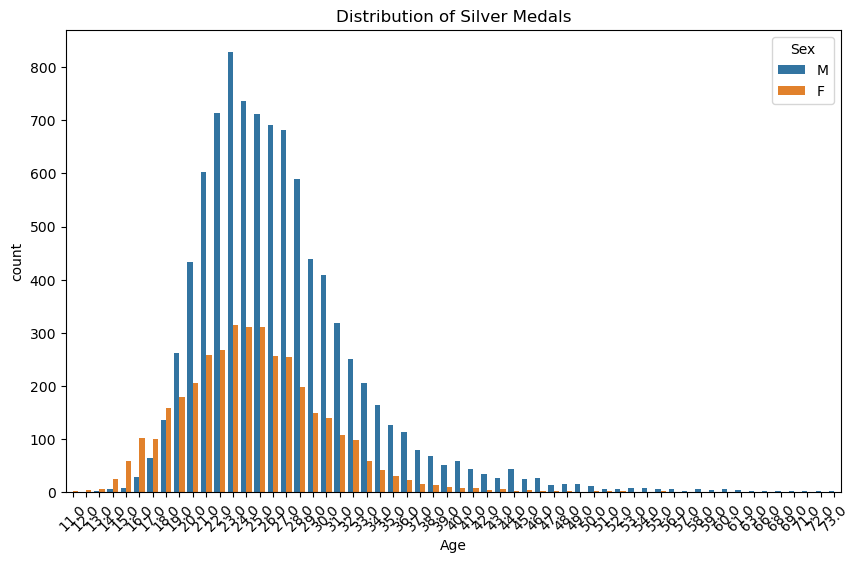

In [389]:
# 은메달
silverMedals = merged[(merged.Medal == 'Silver')]
silverMedals = silverMedals[np.isfinite(silverMedals['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=silverMedals, x=silverMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Silver Medals')

Text(0.5, 1.0, 'Distribution of Bronze Medals')

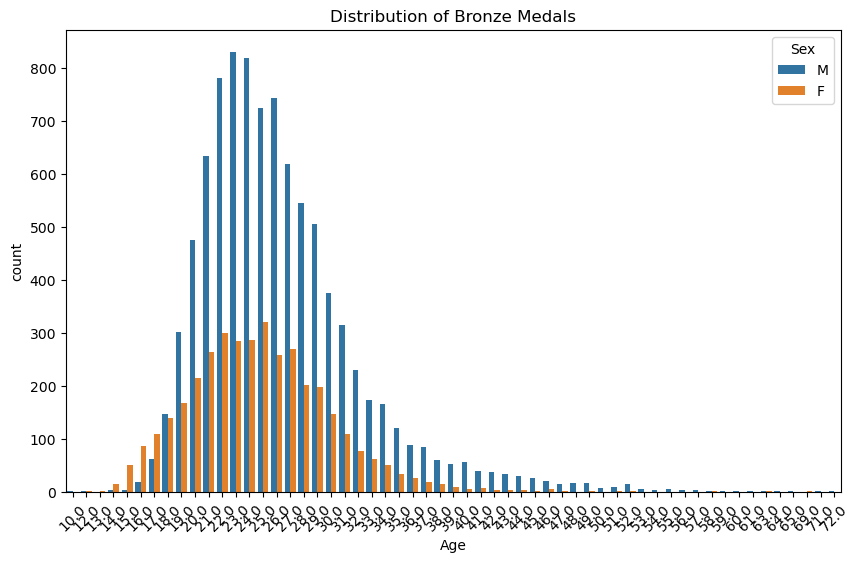

In [390]:
# 동메달
bronzeMedals = merged[(merged.Medal == 'Bronze')]
bronzeMedals = bronzeMedals[np.isfinite(bronzeMedals['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=bronzeMedals, x=bronzeMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Bronze Medals')

### 동계, 하계로 나누어 분석

Text(0.5, 1.0, 'Distribution of Gold Medals in Summer')

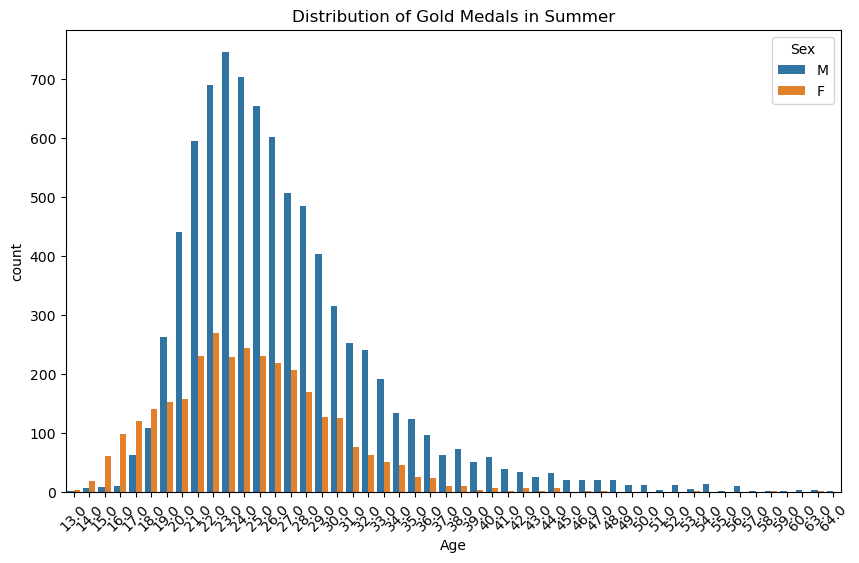

In [391]:
goldMedals = merged[(merged.Medal == 'Gold') & (merged.Season == 'Summer')]
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=goldMedals, x=goldMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Gold Medals in Summer')

Text(0.5, 1.0, 'Distribution of Gold Medals in Winter')

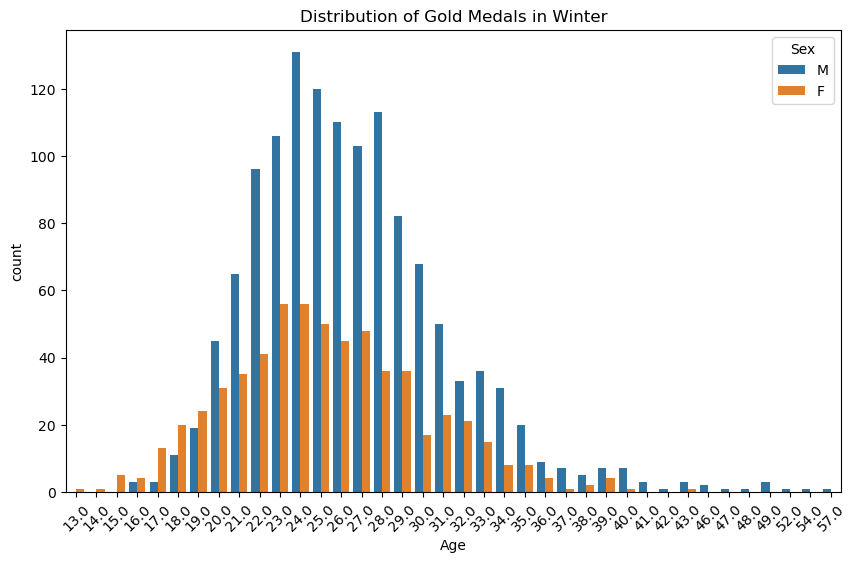

In [392]:
goldMedals = merged[(merged.Medal == 'Gold') & (merged.Season == 'Winter')]
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=goldMedals, x=goldMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Gold Medals in Winter')

Text(0.5, 1.0, 'Distribution of Silver Medals in Summer')

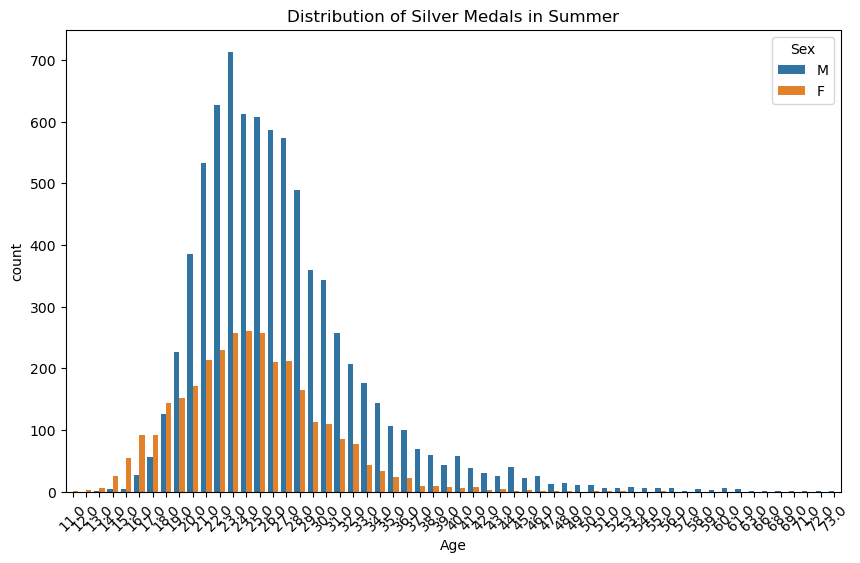

In [393]:
# 은메달 - 하계
silverMedals = merged[(merged.Medal == 'Silver') & (merged.Season == 'Summer')]
silverMedals = silverMedals[np.isfinite(silverMedals['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=silverMedals, x=silverMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Silver Medals in Summer')

Text(0.5, 1.0, 'Distribution of Silver Medals in Winter')

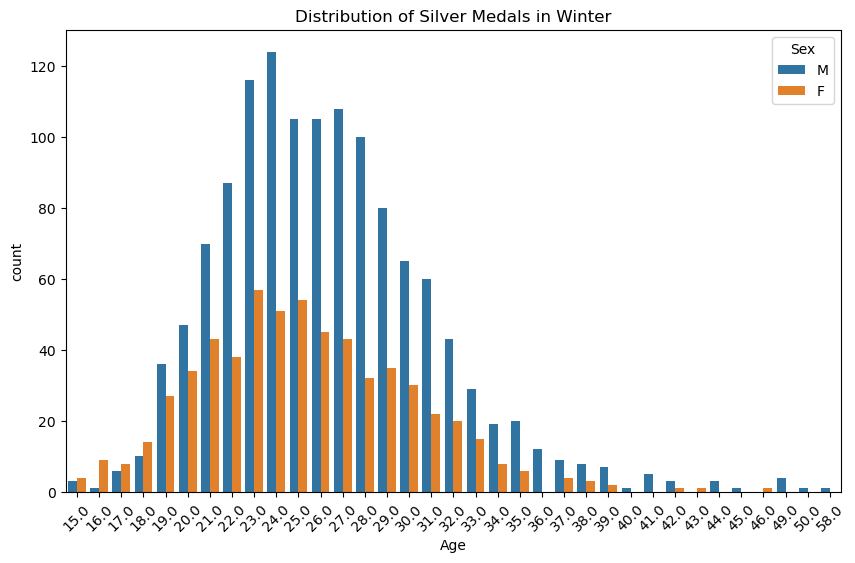

In [394]:
# 은메달 - 동계
silverMedals = merged[(merged.Medal == 'Silver') & (merged.Season == 'Winter')]
silverMedals = silverMedals[np.isfinite(silverMedals['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=silverMedals, x=silverMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Silver Medals in Winter')

Text(0.5, 1.0, 'Distribution of Bronze Medals in Summer')

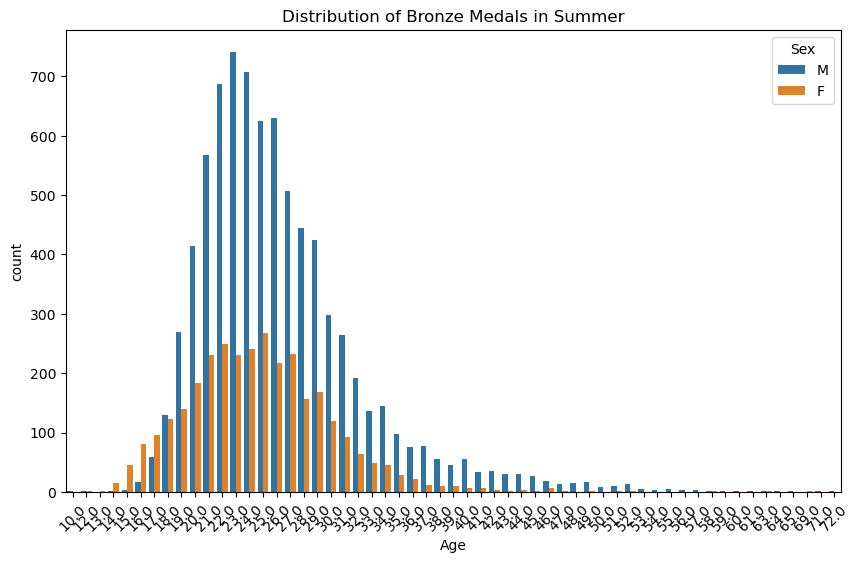

In [395]:
# 동메달 - 하계
bronzeMedals = merged[(merged.Medal == 'Bronze') & (merged.Season == 'Summer')]
bronzeMedals = bronzeMedals[np.isfinite(bronzeMedals['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=bronzeMedals, x=bronzeMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Bronze Medals in Summer')

Text(0.5, 1.0, 'Distribution of Bronze Medals in Winter')

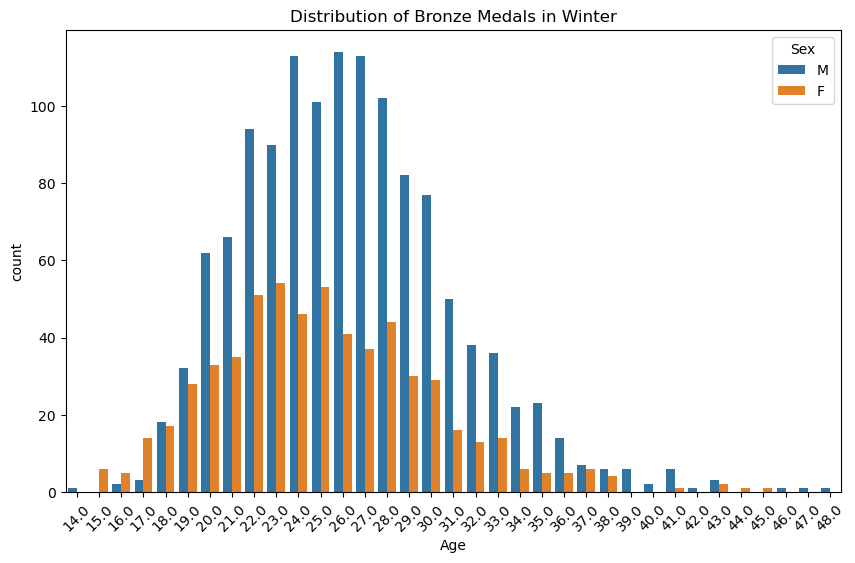

In [396]:
# 동메달 - Winter
bronzeMedals = merged[(merged.Medal == 'Bronze') & (merged.Season == 'Winter')]
bronzeMedals = bronzeMedals[np.isfinite(bronzeMedals['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=bronzeMedals, x=bronzeMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Bronze Medals in Winter')

### 3.2 참가자 분석 : 성별, 하계, 동계

Text(0.5, 1.0, 'Distribution of Atheletes')

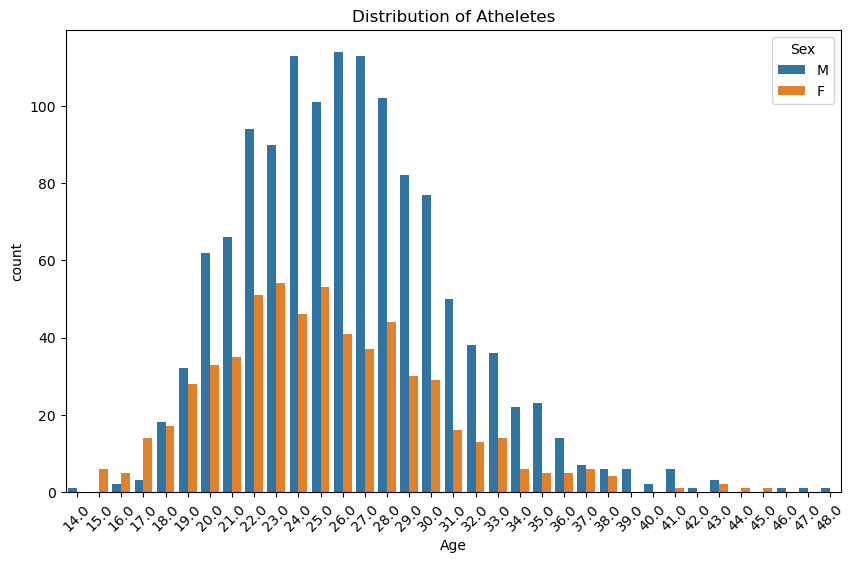

In [397]:
merged_age = merged[np.isfinite(merged['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=bronzeMedals, x=bronzeMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Atheletes')

Text(0.5, 1.0, 'Distribution of Atheletes in Summer')

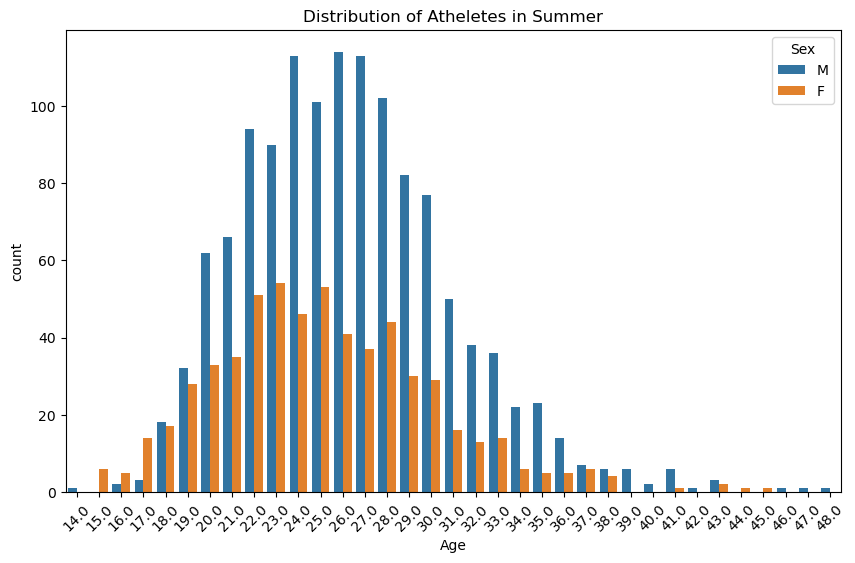

In [398]:
merged_summer = merged[(merged.Season == 'Summer')]
merged_age = merged[np.isfinite(merged['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=bronzeMedals, x=bronzeMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Atheletes in Summer')

Text(0.5, 1.0, 'Distribution of Atheletes in Winter')

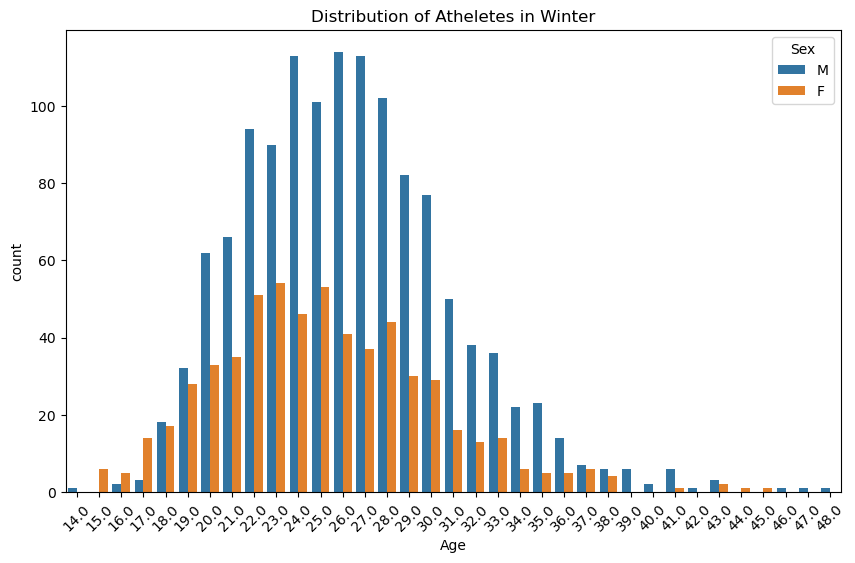

In [399]:
merged_summer = merged[(merged.Season == 'Winter')]
merged_age = merged[np.isfinite(merged['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=bronzeMedals, x=bronzeMedals['Age'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Atheletes in Winter')

### 3.3 연도별 전체선수 / 금메달 선수 변화

Text(0.5, 1.0, 'Distribution of Atheletes in Summer')

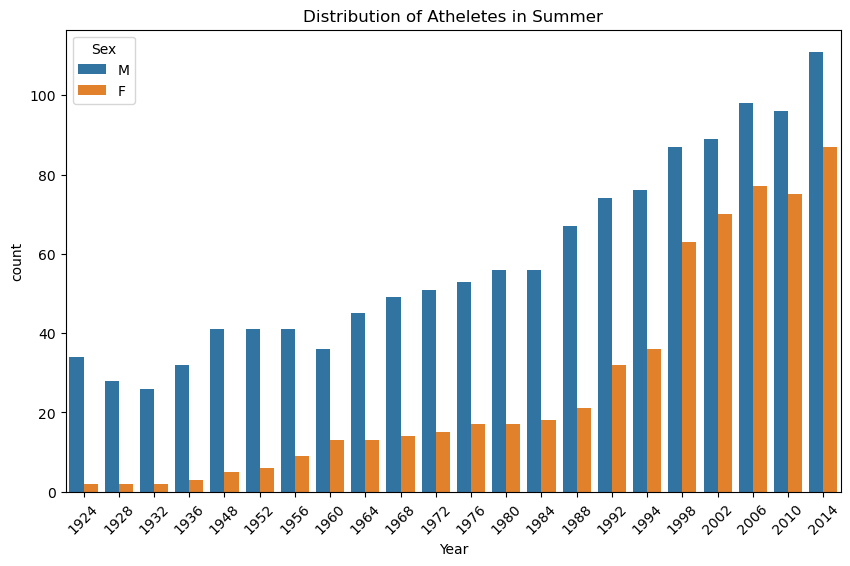

In [400]:
# 하계 전체 선수
merged_summer = merged[(merged.Season == 'Summer')]
merged_age = merged[np.isfinite(merged['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=bronzeMedals, x=bronzeMedals['Year'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Atheletes in Summer')

Text(0.5, 1.0, 'Distribution of Gold Medals in Summer by Year')

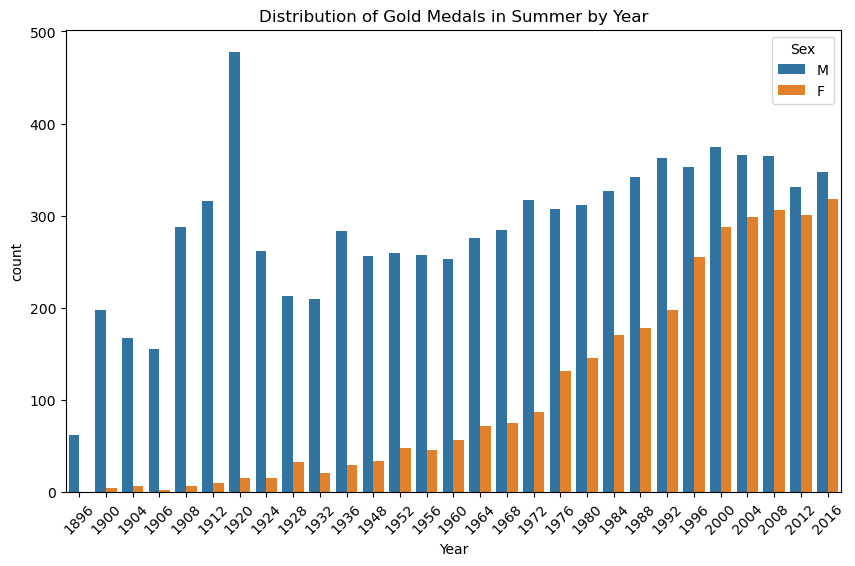

In [401]:
# 하계 금메달
goldMedals = merged[(merged.Medal == 'Gold') & (merged.Season == 'Summer')]
goldMedals = goldMedals[np.isfinite(goldMedals['Year'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=goldMedals, x=goldMedals['Year'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Gold Medals in Summer by Year')

Text(0.5, 1.0, 'Distribution of Atheletes in Winter')

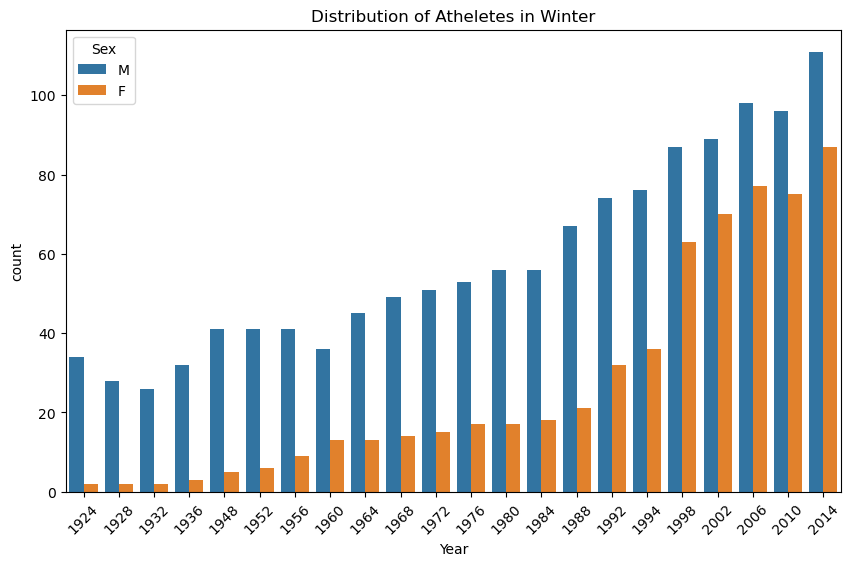

In [402]:
# 동계 전체 선수
merged_summer = merged[(merged.Season == 'Winter')]
merged_age = merged[np.isfinite(merged['Age'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=bronzeMedals, x=bronzeMedals['Year'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Atheletes in Winter')

Text(0.5, 1.0, 'Distribution of Gold Medals in Winter by Year')

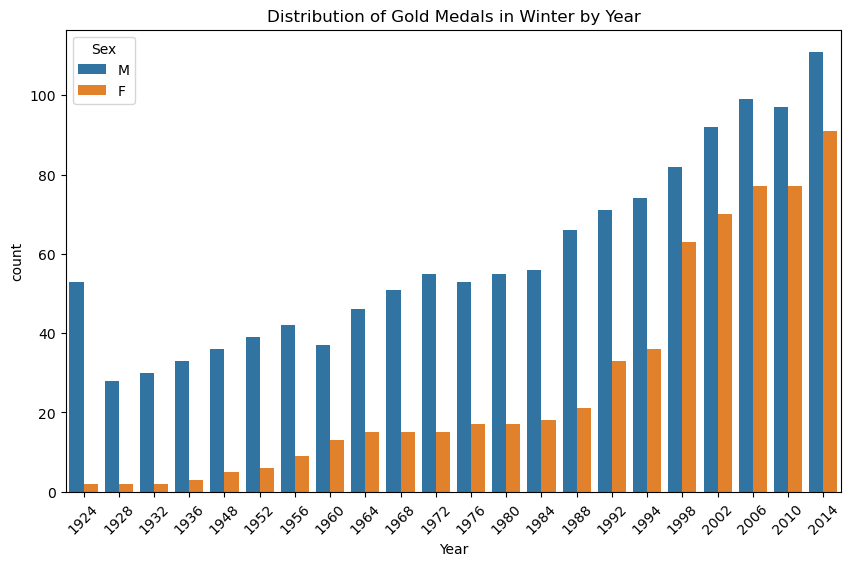

In [403]:
goldMedals = merged[(merged.Medal == 'Gold') & (merged.Season == 'Winter')]
goldMedals = goldMedals[np.isfinite(goldMedals['Year'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=goldMedals, x=goldMedals['Year'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Gold Medals in Winter by Year')

### 종목별 통계

Text(0.5, 1.0, 'Distribution of Gold Medals in Winter by Sport')

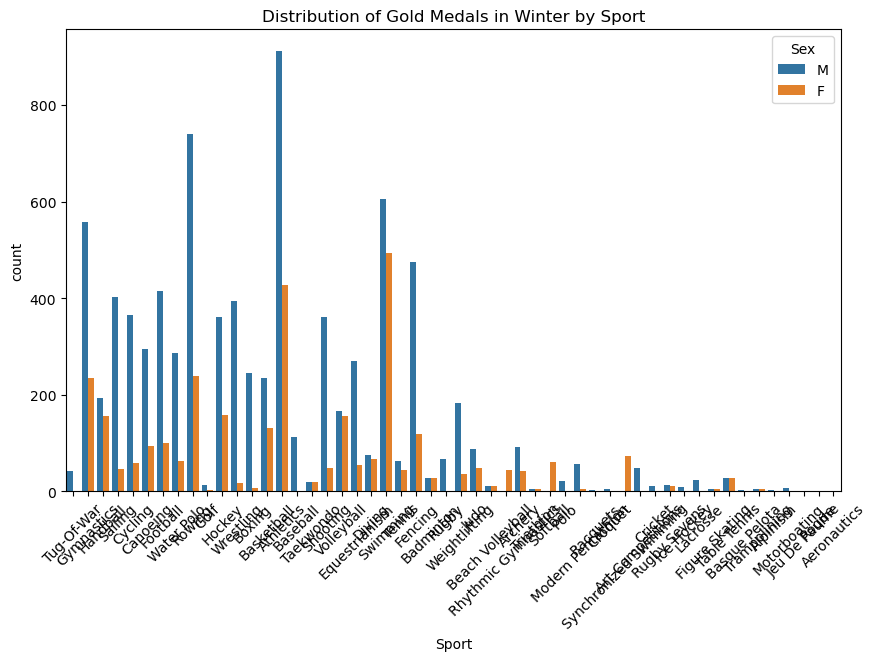

In [404]:
goldMedals = merged[(merged.Medal == 'Gold') & (merged.Season == 'Summer')]
goldMedals = goldMedals[np.isfinite(goldMedals['Year'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=goldMedals, x=goldMedals['Sport'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Gold Medals in Winter by Sport')

Text(0.5, 1.0, 'Distribution of Gold Medals in Winter by Sport')

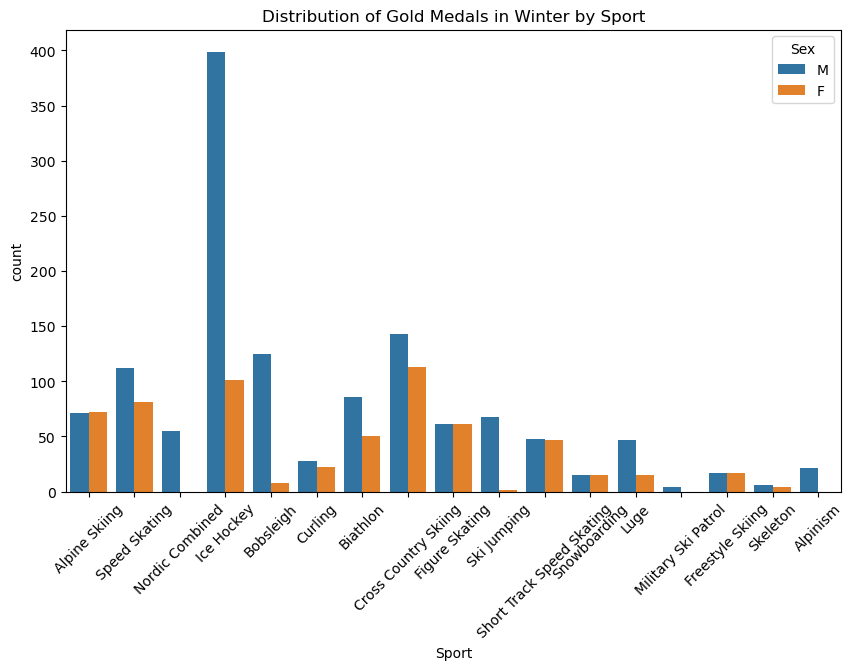

In [405]:
goldMedals = merged[(merged.Medal == 'Gold') & (merged.Season == 'Winter')]
goldMedals = goldMedals[np.isfinite(goldMedals['Year'])]
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.countplot(data=goldMedals, x=goldMedals['Sport'], hue='Sex')
plt.xticks(rotation=45)
plt.title('Distribution of Gold Medals in Winter by Sport')

# Physical Data

In [406]:
def plot_scatter(plot_index: int, column_index: int, xlabel: str, ylabel: str) -> None:
    ROWS = 1; COLUMNS = 2
    TARGET_LABEL = 'Male'; PREDICTED_LABEL = 'Female'
    #
    ax = fig.add_subplot(ROWS, COLUMNS, plot_index)
    plt.scatter(X_test[:,column_index], y_test, label = TARGET_LABEL)
    plt.scatter(X_test[:,column_index], y_pred, label = PREDICTED_LABEL)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

In [407]:
GoldMedalsMale = goldMedals[(goldMedals['Sex'] == 'M' ) & (goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]
GoldMedalsFemale = goldMedals[(goldMedals['Sex'] == 'F' ) & (goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

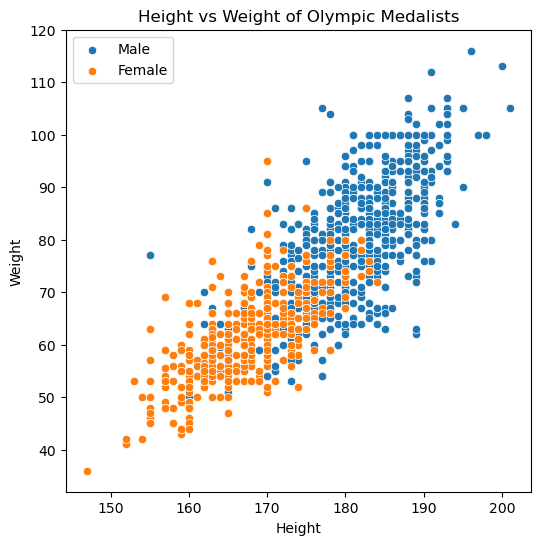

In [408]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1)
sns.scatterplot(x="Height", y="Weight", data=GoldMedalsMale, label='Male')
sns.scatterplot(x="Height", y="Weight", data=GoldMedalsFemale, label='Female')

plt.title('Height vs Weight of Olympic Medalists')
plt.show()

# 4. 데이타 전처리

### 4.1 NaN 값 처리

In [409]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [410]:
merged.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [411]:
merged['Age'].fillna(merged.groupby([merged['NOC'], merged['Year'], merged['Season'], merged['Sport']])['Age'].transform(lambda x: x.fillna(x.median())), inplace=True)
merged['Height'].fillna(merged.groupby([merged['NOC'], merged['Year'], merged['Season'], merged['Sport']])['Height'].transform(lambda x: x.fillna(x.median())), inplace=True)
merged['Weight'].fillna(merged.groupby([merged['NOC'], merged['Year'], merged['Season'], merged['Sport']])['Weight'].transform(lambda x: x.fillna(x.median())), inplace=True)

In [412]:
merged.isnull().sum()

ID             0
Name           0
Sex            0
Age         1470
Height     29645
Weight     35977
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [415]:
merged['Age'].fillna(merged.groupby([merged['NOC'], merged['Season']])['Age'].transform(lambda x: x.fillna(x.median())), inplace=True)
merged['Height'].fillna(merged.groupby([merged['NOC'], merged['Season']])['Height'].transform(lambda x: x.fillna(x.median())), inplace=True)
merged['Weight'].fillna(merged.groupby([merged['NOC'], merged['Season']])['Weight'].transform(lambda x: x.fillna(x.median())), inplace=True)

In [416]:
merged.isnull().sum()

ID             0
Name           0
Sex            0
Age           13
Height        40
Weight       190
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [418]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,170.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,173.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [419]:
# NaN 데이타 처리
merged['Medal'].fillna('No', inplace=True) # Nan을 'No'로 대체

# TO DO : 현재는 NaN이 있으면 삭제로 처리 => 같은해 같은팀의 중간값으로 채움
merged = merged.dropna(subset=['Age', 'Height', 'Weight'], how='any', axis=0)

# 칼럼 제거
merged.drop(['Name'], axis=1, inplace=True)
merged.drop(['Team'], axis=1, inplace=True)
merged.drop(['Games'], axis=1, inplace=True)
merged.drop(['region'], axis=1, inplace=True)
merged.drop(['notes'], axis=1, inplace=True)

### 4.2 dummy 변환

In [420]:
# Dummy transform
merged = pd.get_dummies(merged, columns = ['Sex','NOC','Season', 'City', 'Sport', 'Event'])

# Label Encoding
merged['Label'] = merged['Medal'].replace('No',0).replace('Gold',1).replace('Silver', 2).replace('Bronze', 3)
merged.drop(['Medal'], axis=1, inplace=True)

In [421]:
merged.isnull().sum()

ID                                                      0
Age                                                     0
Height                                                  0
Weight                                                  0
Year                                                    0
                                                       ..
Event_Wrestling Women's Heavyweight, Freestyle          0
Event_Wrestling Women's Light-Heavyweight, Freestyle    0
Event_Wrestling Women's Lightweight, Freestyle          0
Event_Wrestling Women's Middleweight, Freestyle         0
Label                                                   0
Length: 1109, dtype: int64

### 4.3 레이블 처리

In [422]:
# Medal 칼럼은 레이블로 분리
labels = merged['Label']
merged.drop(['Label'], axis=1, inplace=True)

In [423]:
merged.isnull().sum()

ID                                                      0
Age                                                     0
Height                                                  0
Weight                                                  0
Year                                                    0
                                                       ..
Event_Wrestling Women's Flyweight, Freestyle            0
Event_Wrestling Women's Heavyweight, Freestyle          0
Event_Wrestling Women's Light-Heavyweight, Freestyle    0
Event_Wrestling Women's Lightweight, Freestyle          0
Event_Wrestling Women's Middleweight, Freestyle         0
Length: 1108, dtype: int64

In [424]:
labels.isnull().sum()

0

# 5. 데이타 분리 : 훈련세트, 시험 세트

In [425]:
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(merged, 
                                                    labels, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE) 

In [426]:
# id 칼럼은 별도 저장 
train_ids = X_train['ID']
test_ids = X_test['ID']

# 저장되었으므로 id는 데이타에서 삭제
X_train.drop(['ID'], axis=1, inplace=True)
X_test.drop(['ID'], axis=1, inplace=True)

In [427]:
print('train set :', X_train.shape)
print('test set :', X_test.shape)
# NaN drop : train set : (164932, 922)
# Nan drop : test set : (41233, 922)

train set : (216738, 1107)
test set : (54185, 1107)


In [428]:
X_train.isnull().sum()

Age                                                     0
Height                                                  0
Weight                                                  0
Year                                                    0
Sex_F                                                   0
                                                       ..
Event_Wrestling Women's Flyweight, Freestyle            0
Event_Wrestling Women's Heavyweight, Freestyle          0
Event_Wrestling Women's Light-Heavyweight, Freestyle    0
Event_Wrestling Women's Lightweight, Freestyle          0
Event_Wrestling Women's Middleweight, Freestyle         0
Length: 1107, dtype: int64

# 6. 모델 훈련 : 훈련 세트

### 6.1 Decision Tree

In [429]:
def printDoubleLine(title: str) -> None:
    print('========================================================')
    print('[', title, ']')

def printLine(title: str = None) -> None:
    print('--------------------------------------------------------')
    if title is not None:
        print('[', title, ']')
    return

[ Decision Tree ]
estimator type : classifier
Accuracy : 0.8880265806514199
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     35190
           1       0.63      0.61      0.62      2055
           2       0.55      0.55      0.55      1973
           3       0.52      0.53      0.52      2015

    accuracy                           0.89     41233
   macro avg       0.66      0.66      0.66     41233
weighted avg       0.89      0.89      0.89     41233



Text(0.5, 1.0, 'Decion Tree (F1 Score : 0.888)')

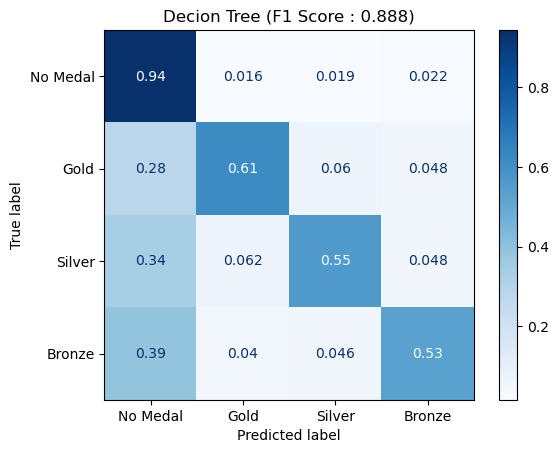

In [240]:
label_names=['No Medal', 'Gold', 'Silver', 'Bronze']
printDoubleLine('Decision Tree')
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE) 
print('estimator type :', decision_tree._estimator_type)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
plot = plot_confusion_matrix(decision_tree, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Decion Tree (F1 Score : ' + str(round(f1score, 3)) + ')')

[ Decision Tree ]
estimator type : classifier
Accuracy : 0.8953400387561133
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     46359
           1       0.63      0.64      0.64      2562
           2       0.58      0.58      0.58      2595
           3       0.55      0.55      0.55      2669

    accuracy                           0.90     54185
   macro avg       0.68      0.68      0.68     54185
weighted avg       0.90      0.90      0.90     54185



Text(0.5, 1.0, 'Decion Tree (F1 Score : 0.896)')

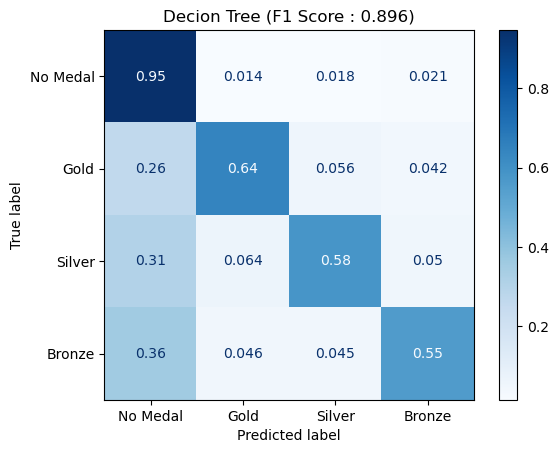

In [430]:
label_names=['No Medal', 'Gold', 'Silver', 'Bronze']
printDoubleLine('Decision Tree')
decision_tree = DecisionTreeClassifier(random_state=RANDOM_STATE) 
print('estimator type :', decision_tree._estimator_type)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)
print(classification_report(y_test, y_pred))
plot = plot_confusion_matrix(decision_tree, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label_names, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize='true') # 'true', 'pred', 'all' 중에서 지정 가능. default=None
f1score = f1_score(y_test, y_pred, average='weighted')
plot.ax_.set_title('Decion Tree (F1 Score : ' + str(round(f1score, 3)) + ')')

# 7. 모델 예측 : 시험 세트

### 참고자료

1. 
2. 
3. 
4. 
5. 

# 감사합니다.